In [66]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
import networkx.algorithms.community as nxcom
import itertools

In [67]:
#A04.1 Community detection
#Load data
g_dolphins = nx.read_gml("data/graph_dolphins.gml")
g_jazz = nx.read_gml("data/graph_jazz_collab.gml")
g_karate = nx.read_gml("data/graph_karate.gml")

# (a) the greedy modularity maximization by Clauset Newman and Moore
greedy_dolphins = nxcom.greedy_modularity_communities(g_dolphins)
greedy_jazz = nxcom.greedy_modularity_communities(g_jazz)
greedy_karate = nxcom.greedy_modularity_communities(g_karate)

# (b)  the Girvan-Newman algorithm
gir_dolphins = nxcom.girvan_newman(g_dolphins)
gir_jazz = nxcom.girvan_newman(g_jazz)
gir_karate = nxcom.girvan_newman(g_karate)

In [68]:
#Greedy
def plot_graph(G, community, num, title):
    

    if num == 3:
        nodesred, nodesblue, nodesgreen = community
        for v in G.nodes():
            if v in nodesred:
                G.nodes[v]['color'] = 'red'
            elif v in nodesblue:
                G.nodes[v]['color'] = 'blue'
            elif v in nodesgreen:
                G.nodes[v]['color'] = 'green'
    elif num == 4:
        nodesred, nodesblue, nodesgreen, nodesyellow = community
        for v in G.nodes():
            if v in nodesred:
                G.nodes[v]['color'] = 'red'
            elif v in nodesblue:
                G.nodes[v]['color'] = 'blue'
            elif v in nodesgreen:
                G.nodes[v]['color'] = 'green'
            elif v in nodesyellow:
                G.nodes[v]['color'] = 'yellow'
    
    nx.draw(G,with_labels=True,node_color = [G.nodes[v]['color'] for v in G.nodes()])
    plt.title(title)

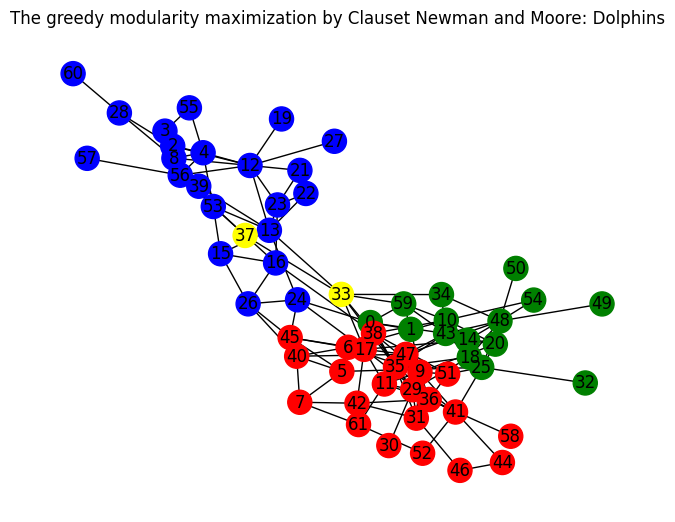

In [69]:
plot_graph(g_dolphins, greedy_dolphins, len(greedy_dolphins), "The greedy modularity maximization by Clauset Newman and Moore: Dolphins")

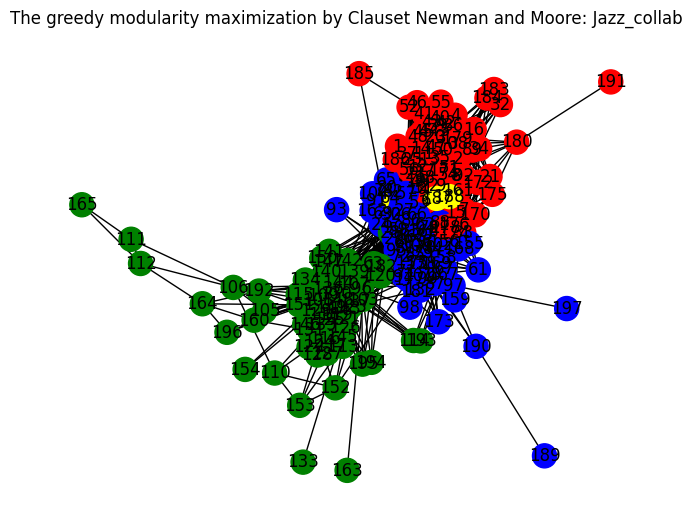

In [70]:
plot_graph(g_jazz, greedy_jazz, len(greedy_jazz), "The greedy modularity maximization by Clauset Newman and Moore: Jazz_collab")

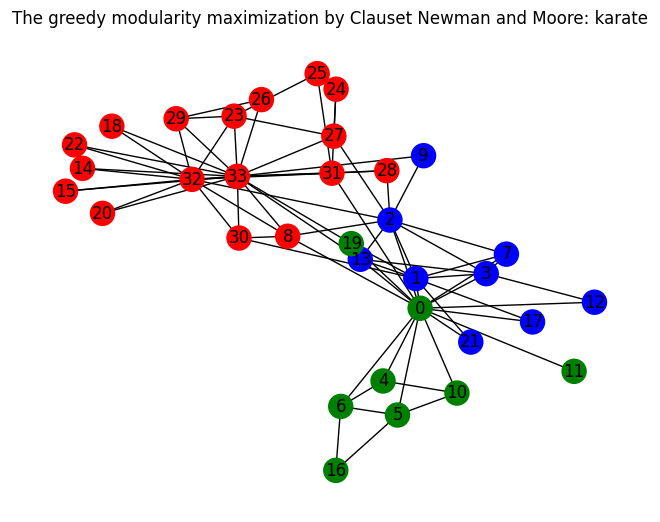

In [71]:
plot_graph(g_karate, greedy_karate, len(greedy_karate), "The greedy modularity maximization by Clauset Newman and Moore: karate")

In [88]:
#Girvan
#nxcom.modularity(gir_dolphins)
def get_comp(graph, gir):
    communities = []
    k = 2 
    for comp in itertools.islice(gir, k):
        nxcom.modularity(graph, tuple(sorted(c) for c in comp))
        communities.append(tuple(sorted(c) for c in comp))
    print(nxcom.modularity(graph, communities))    
    #return communities



In [87]:
get_comp(g_dolphins, gir_dolphins)
#com_dolphines = get_comp(gir_dolphins)
#print(com_dolphines)

0.4660021359914559


In [74]:
#Compare with Randomise
grnd_dolphins = nx.algorithms.smallworld.random_reference(g_dolphins,niter = 20, connectivity=False)
grnd_jazz = nx.algorithms.smallworld.random_reference(g_jazz,niter = 20, connectivity=False)
grnd_karate = nx.algorithms.smallworld.random_reference(g_karate,niter = 20, connectivity=False)

# (a) the greedy modularity maximization by Clauset Newman and Moore
r_greedy_dolphins = nxcom.greedy_modularity_communities(grnd_dolphins)
r_greedy_jazz = nxcom.greedy_modularity_communities(grnd_jazz)
r_greedy_karate = nxcom.greedy_modularity_communities(grnd_karate)

# (b)  the Girvan-Newman algorithm
r_gir_dolphins = nxcom.girvan_newman(grnd_dolphins)
r_gir_jazz = nxcom.girvan_newman(grnd_jazz)
r_gir_karate = nxcom.girvan_newman(grnd_karate)

In [75]:
# (a) the greedy modularity maximization by Clauset Newman and Moore
print("Dolphins: Communities before randomize: " + str(len(greedy_dolphins)) + " & Communities after randomize: " + str(len(r_greedy_dolphins)))
print("Jazz: Communities before randomize: " + str(len(greedy_jazz)) + " & Communities after randomize: " + str(len(r_greedy_jazz)))
print("Karate: Communities before randomize: " + str(len(greedy_karate)) + " & Communities after randomize: " + str(len(r_greedy_karate)))

Dolphins: Communities before randomize: 4 & Communities after randomize: 7
Jazz: Communities before randomize: 4 & Communities after randomize: 5
Karate: Communities before randomize: 3 & Communities after randomize: 5


In [100]:
#A04.2 Erdos-Renyi random networks
#TASK 1 Generate networks
def plot_erdos(k, title):
    G = nx.erdos_renyi_graph(500, k/(500-1))
    color_map = []
    for node in G:
        if node < 10:
            color_map.append('blue')
        else: 
            color_map.append('green')      
    nx.draw(G, node_color=color_map, with_labels=True)
    plt.title(title)
    plt.show()

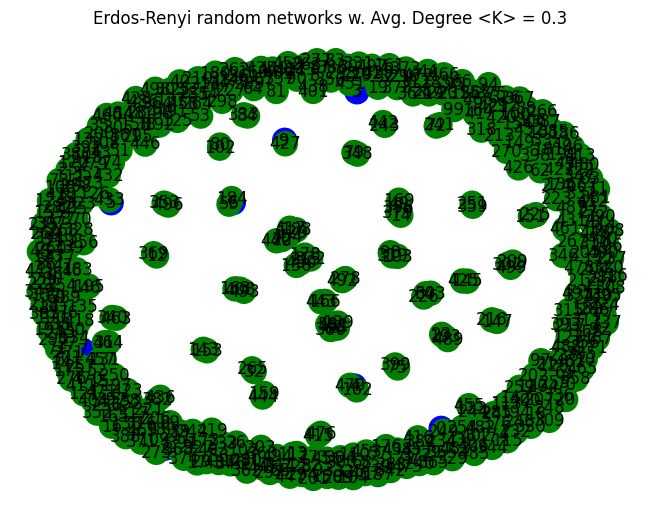

In [101]:
#(a) k = 0.3
plot_erdos(0.3, "Erdos-Renyi random networks w. Avg. Degree <K> = 0.3")

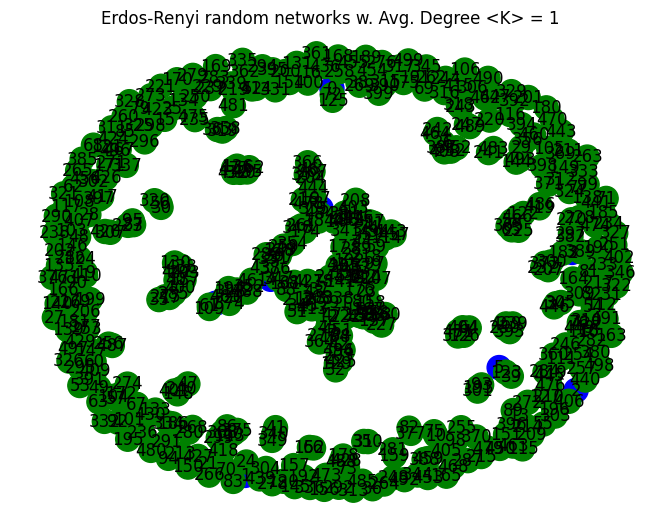

In [104]:
#(b) k = 1
plot_erdos(1, "Erdos-Renyi random networks w. Avg. Degree <K> = 1")

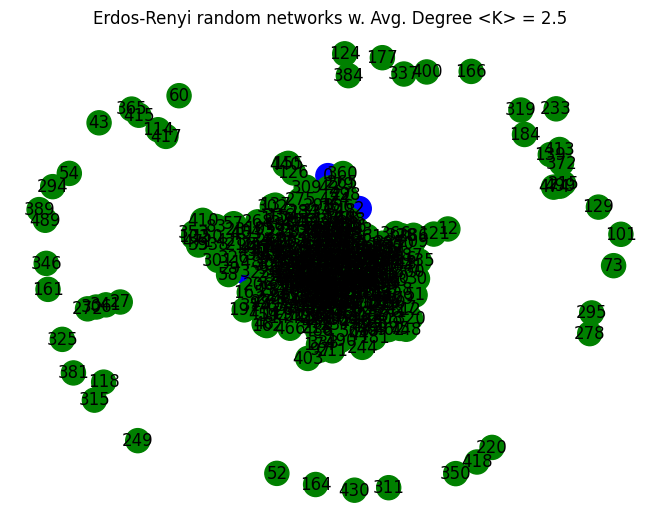

In [105]:
#(c) k = 2.5
plot_erdos(2.5, "Erdos-Renyi random networks w. Avg. Degree <K> = 2.5")

In [ ]:
#TASK 2
#1. Plot the average fraction of nodes in the largest connected component ⟨𝑁𝐺/𝑁⟩ as a function of 𝑝 and mark with a vertical line the critical probability


In [77]:
#2. Plot the average clustering ⟨𝐶⟩ as a function of 𝑝 and give an interpretation of the result

In [78]:
#A04.3 Small-world with high clustering